# **Exploring Subjective Data from Restaurant Reviews: An API-based Analysis**

# 1.Install libraries

In [ ]:
!pip install yelpapi
from yelpapi import YelpAPI
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import csv
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
import requests
import re
from textblob import TextBlob
import seaborn as sns
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px


#2. Retrieve restaurant reviews in London using Yelp API and save them to a CSV file.

In [ ]:
#  API key
api_key = "vfNiV_DeD2Abvs5hudRuoT7oSeYxovNFT7hT95Ufone773jSpA9T-4DH1NsuVi56D26oQyD1xTmVZc-zNDIhlKI6XYgEotiVsJzDpO-omwbetuXwRCvPtyrVxgbwY3Yx"

# Initialize YelpAPI client
yelp_api = YelpAPI(api_key)

# Define search parameters
params = {
    "location": "london",
    "term": "restaurants",
    "sort_by": "rating",
    "limit": 50
}

# Make API request
response = yelp_api.search_query(**params)

# Parse response into a pandas DataFrame
reviews = []
for business in response["businesses"]:
    reviews += yelp_api.reviews_query(id=business["id"])["reviews"]
reviews_df = pd.DataFrame(reviews)

# Save reviews to CSV file
reviews_df.to_csv("london_restaurant_reviews.csv", index=False)


#2.a. Process text data and generate a word cloud for London restaurant reviews dataset.

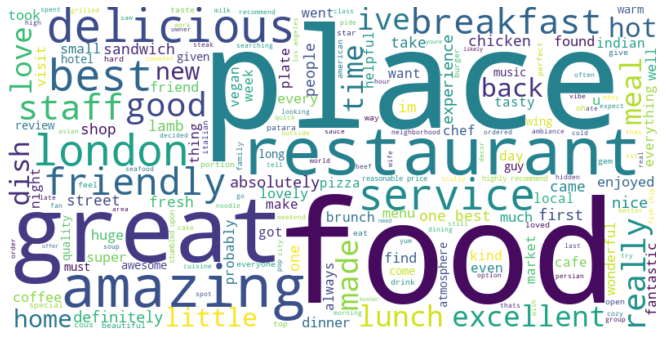

In [ ]:
# Define the preprocessing function
def preprocess_text(text):
    # Define a string of punctuation characters
    punctuation = string.punctuation

    # Define a set of stopwords
    stop_words = set(stopwords.words('english'))

    # Define a lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    # Return the preprocessed text
    return preprocessed_text

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/london_restaurant_reviews.csv')

# Apply the preprocessing function to the text column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Save the updated DataFrame to a CSV file
df.to_csv("London_restaurant_preprocessed_reviews.csv", index=False)


# Load the CSV into a pandas dataframe
df = pd.read_csv('/content/London_restaurant_preprocessed_reviews.csv')

# Concatenate all the preprocessed_text into a single string
text = ' '.join(df['preprocessed_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



#3.Retrieve restaurant reviews in Tower Hamlets using Yelp API and save them to a CSV file.
*I will be creating the corpus of data in more (repetitive) steps due to limited number of requests permited


In [ ]:
# Set up the Yelp API endpoint URLs
SEARCH_API_URL = 'https://api.yelp.com/v3/businesses/search'
REVIEWS_API_URL = 'https://api.yelp.com/v3/businesses/{}/reviews'

# Set up the API authentication credentials
API_KEY = 'vfNiV_DeD2Abvs5hudRuoT7oSeYxovNFT7hT95Ufone773jSpA9T-4DH1NsuVi56D26oQyD1xTmVZc-zNDIhlKI6XYgEotiVsJzDpO-omwbetuXwRCvPtyrVxgbwY3Yx'
HEADERS = {
    'Authorization': 'Bearer {}'.format(API_KEY)
}

# Set up the search parameters
SEARCH_PARAMS = {
    'location': 'Tower Hamlets, London',
    'categories': 'restaurants',
    'limit': 50  # Maximum number of businesses to retrieve per request
}

# Set up the reviews output file
OUTPUT_FILE = 'tower_hamlets_restaurant_reviews.csv'
OUTPUT_HEADERS = ['business_name', 'review_id', 'rating', 'text', 'time_created']

def get_reviews_for_business(business_id):
    """Retrieves the reviews for the specified business."""
    response = requests.get(REVIEWS_API_URL.format(business_id), headers=HEADERS)
    reviews_data = response.json()['reviews']
    return reviews_data

def search_for_businesses():
    """Searches for businesses in Tower Hamlets and retrieves their reviews."""
    reviews_data = []

    # Loop over the search results pages to retrieve all businesses in Tower Hamlets
    for offset in range(0, 1000, 50):
        SEARCH_PARAMS['offset'] = offset
        response = requests.get(SEARCH_API_URL, headers=HEADERS, params=SEARCH_PARAMS)
        businesses_data = response.json()['businesses']

        # Loop over each business and retrieve their reviews
        for business_data in businesses_data:
            reviews_data.extend([
                {
                    'business_name': business_data['name'],
                    'review_id': review_data['id'],
                    'rating': review_data['rating'],
                    'text': review_data['text'],
                    'time_created': review_data['time_created']
                }
                for review_data in get_reviews_for_business(business_data['id'])
            ])

    return reviews_data

def save_reviews_to_csv(reviews_data, output_file):
    """Saves the reviews data to a CSV file."""
    with open(output_file, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=OUTPUT_HEADERS)
        writer.writeheader()
        writer.writerows(reviews_data)

if __name__ == '__main__':
    reviews_data = search_for_businesses()
    save_reviews_to_csv(reviews_data, OUTPUT_FILE)


#3.a. Process text data and generate a bar chart for Tower Hamlets restaurant reviews dataset.

In [ ]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/tower_hamlets_restaurant_reviews.csv')

# Print the column names
print(df.columns)


Index(['business_name', 'review_id', 'rating', 'text', 'time_created'], dtype='object')


In [ ]:

# Define the preprocessing function
def preprocess_text(text):
    # Define a string of punctuation characters
    punctuation = string.punctuation

    # Define a set of stopwords
    stop_words = set(stopwords.words('english'))

    # Define a lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    # Return the preprocessed text
    return preprocessed_text

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/tower_hamlets_restaurant_reviews.csv')

# Apply the preprocessing function to the text column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Save the updated DataFrame to a CSV file
df.to_csv("tower_hamlets_preprocessed_reviews.csv", index=False)


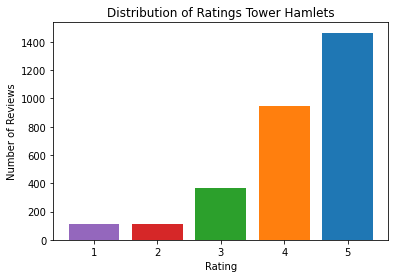

In [ ]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv('/content/tower_hamlets_preprocessed_reviews.csv')

# Count the number of reviews for each rating
rating_counts = df['rating'].value_counts()

# Create a bar chart using matplotlib
plt.bar(rating_counts.index, rating_counts.values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])

# Add labels and a title
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings Tower Hamlets')

# Show the plot
plt.show()


#4.Retrieve restaurant reviews in Cardiff using Yelp API and save them to a CSV file.

In [ ]:
# Set up the Yelp API endpoint URLs
  SEARCH_API_URL = 'https://api.yelp.com/v3/businesses/search'
  REVIEWS_API_URL = 'https://api.yelp.com/v3/businesses/{}/reviews'

  # Set up the API authentication credentials
  API_KEY = 'vfNiV_DeD2Abvs5hudRuoT7oSeYxovNFT7hT95Ufone773jSpA9T-4DH1NsuVi56D26oQyD1xTmVZc-zNDIhlKI6XYgEotiVsJzDpO-omwbetuXwRCvPtyrVxgbwY3Yx'
HEADERS = {
    'Authorization': 'Bearer {}'.format(API_KEY)
}

# Set up the search parameters
SEARCH_PARAMS = {
    'location': 'Cardiff, UK',
    'categories': 'restaurants',
    'limit': 50  # Maximum number of businesses to retrieve per request
}

# Set up the reviews output file
OUTPUT_FILE = 'cardiff_restaurant_reviews.csv'
OUTPUT_HEADERS = ['business_name', 'review_id', 'rating', 'text', 'time_created']

def get_reviews_for_business(business_id):
    """Retrieves the reviews for the specified business."""
    response = requests.get(REVIEWS_API_URL.format(business_id), headers=HEADERS)
    if response.status_code != 200:
        print(f"Error: API call failed with status code {response.status_code}")
        return None
    data = response.json()
    if 'reviews' not in data:
        print(f"Error: 'reviews' key not found in API response: {data}")
        return None
    reviews_data = data['reviews']
    return reviews_data

def search_for_businesses():
    """Searches for businesses in Cardiff and retrieves their reviews."""
    reviews_data = []

    # Loop over the search results pages to retrieve all businesses in Cardiff
    for offset in range(0, 1000, 50):
        SEARCH_PARAMS['offset'] = offset
        response = requests.get(SEARCH_API_URL, headers=HEADERS, params=SEARCH_PARAMS)
        businesses_data = response.json()['businesses']

        # Loop over each business and retrieve their reviews
        for business_data in businesses_data:
            reviews_data.extend([
                {
                    'business_name': business_data['name'],
                    'review_id': review_data['id'],
                    'rating': review_data['rating'],
                    'text': review_data['text'],
                    'time_created': review_data['time_created']
                }
                for review_data in get_reviews_for_business(business_data['id'])
            ])

    return reviews_data

def save_reviews_to_csv(reviews_data, output_file):
    """Saves the reviews data to a CSV file."""
    with open(output_file, 'w', newline='') as csv_file:
        writer = csv.DictWriter(csv_file, fieldnames=OUTPUT_HEADERS)
        writer.writeheader()
        writer.writerows(reviews_data)

if __name__ == '__main__':
    reviews_data = search_for_businesses()
    save_reviews_to_csv(reviews_data, OUTPUT_FILE)


#4.a. Process text data and generate a pie chart for Cardiff restaurant reviews dataset.


In [ ]:
# Define the preprocessing function
def preprocess_text(text):
    # Define a string of punctuation characters
    punctuation = string.punctuation

    # Define a set of stopwords
    stop_words = set(stopwords.words('english'))

    # Define a lemmatizer
    lemmatizer = nltk.WordNetLemmatizer()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    words = nltk.word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a string
    preprocessed_text = ' '.join(words)

    # Return the preprocessed text
    return preprocessed_text

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('/content/cardiff_restaurant_reviews.csv')

# Apply the preprocessing function to the text column
df['preprocessed_text'] = df['text'].apply(preprocess_text)

# Save the updated DataFrame to a CSV file
df.to_csv("cardiff_preprocessed_reviews.csv", index=False)

Pie chart

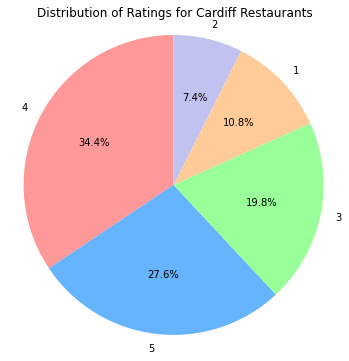

In [ ]:
# load the preprocessed reviews data from CSV file
df = pd.read_csv('/content/cardiff_preprocessed_reviews.csv')

# count the number of reviews for each rating value
rating_counts = df['rating'].value_counts()

# create a pie chart of the rating counts
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']  # specify custom colors for the pie chart
ax.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Distribution of Ratings for Cardiff Restaurants')

plt.show()


In [ ]:
print(df.columns)

Index(['business_name', 'review_id', 'rating', 'text', 'time_created',
       'preprocessed_text'],
      dtype='object')


# 5.Perform sentiment analysis on London restaurant reviews, Tower Hamlets reviews, and Cardiff reviews and visualise the distribution in a histogram.


London Restaurant Reviews:
rating
5    52.534626
Name: sentiment_score, dtype: float64

Tower Hamlets Reviews:
rating
1     -7.004903
2     14.885275
3     75.241412
4    262.335457
5    520.914256
Name: sentiment_score, dtype: float64

Cardiff Reviews:
rating
1    -19.211876
2     16.052605
3     73.242841
4    148.738982
5    186.022595
Name: sentiment_score, dtype: float64


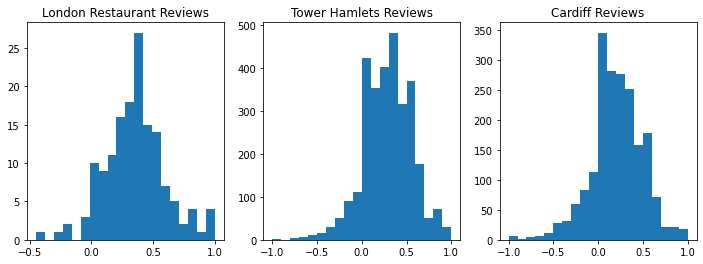

Mean sentiment score for London Restaurant Reviews: 0.35023083955726814
Mean sentiment score for Tower Hamlets Reviews: 0.2887904988321864
Mean sentiment score for Cardiff Reviews: 0.20592326879187436


In [ ]:

# Load the CSV into a pandas dataframe
df1 = pd.read_csv('/content/London_restaurant_preprocessed_reviews.csv')
df2 = pd.read_csv('/content/tower_hamlets_preprocessed_reviews.csv')
df3 = pd.read_csv('/content/cardiff_preprocessed_reviews.csv')

# Define a function to get the sentiment score of a text
def get_sentiment_score(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply the sentiment analysis function to the preprocessed_text column
df1['sentiment_score'] = df1['preprocessed_text'].apply(get_sentiment_score)
df2['sentiment_score'] = df2['preprocessed_text'].apply(get_sentiment_score)
df3['sentiment_score'] = df3['preprocessed_text'].apply(get_sentiment_score)

# Group the reviews by rating and sum the sentiment scores for each group in each dataframe
total_sentiment_scores1 = df1.groupby('rating')['sentiment_score'].sum()
total_sentiment_scores2 = df2.groupby('rating')['sentiment_score'].sum()
total_sentiment_scores3 = df3.groupby('rating')['sentiment_score'].sum()

# Print the total sentiment scores for each rating in each dataframe
print("London Restaurant Reviews:")
print(total_sentiment_scores1)
print("\nTower Hamlets Reviews:")
print(total_sentiment_scores2)
print("\nCardiff Reviews:")
print(total_sentiment_scores3)

# Create a histogram of the sentiment scores for each dataframe
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
axs[0].hist(df1['sentiment_score'], bins=20)
axs[0].set_title('London Restaurant Reviews')
axs[1].hist(df2['sentiment_score'], bins=20)
axs[1].set_title('Tower Hamlets Reviews')
axs[2].hist(df3['sentiment_score'], bins=20)
axs[2].set_title('Cardiff Reviews')
plt.show()

# Calculate the mean sentiment score for each dataframe
mean_score1 = df1['sentiment_score'].mean()
mean_score2 = df2['sentiment_score'].mean()
mean_score3 = df3['sentiment_score'].mean()

# Print the mean sentiment scores
print(f"Mean sentiment score for London Restaurant Reviews: {mean_score1}")
print(f"Mean sentiment score for Tower Hamlets Reviews: {mean_score2}")
print(f"Mean sentiment score for Cardiff Reviews: {mean_score3}")


# 6.Generate a Heat Map of the mean scores of the 3 datasets, sorted by rating

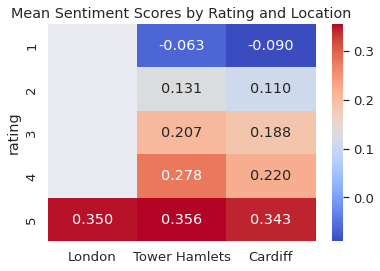

In [ ]:
# Group the reviews by rating and calculate the mean sentiment score for each group in each dataframe
mean_sentiment_scores1 = df1.groupby('rating')['sentiment_score'].mean()
mean_sentiment_scores2 = df2.groupby('rating')['sentiment_score'].mean()
mean_sentiment_scores3 = df3.groupby('rating')['sentiment_score'].mean()

# Create a new dataframe of the mean sentiment scores for each rating in each dataframe
df_means = pd.DataFrame({'London': mean_sentiment_scores1,
                         'Tower Hamlets': mean_sentiment_scores2,
                         'Cardiff': mean_sentiment_scores3})

# Create a heatmap of the mean sentiment scores for each rating in each dataframe
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 4))
sns.heatmap(df_means, cmap='coolwarm', annot=True, fmt='.3f')
plt.title('Mean Sentiment Scores by Rating and Location')
plt.show()

# 7.VAD for London 5star reviews dataset and visualise using 2 different types of 3d maps

In [ ]:
# Define a function to get the VAD score of a word using the NRC VAD Lexicon
def get_word_vad(word):
    synsets = list(swn.senti_synsets(word))
    if synsets:
        return synsets[0].pos_score(), synsets[0].neg_score(), synsets[0].obj_score()
    else:
        return 0.0, 0.0, 1.0
        # Filter the dataframes to only include 5-star ratings
df1_5stars = df1[df1['rating'] == 5]
df2_5stars = df2[df2['rating'] == 5]
df3_5stars = df3[df3['rating'] == 5]

# Assign VAD scores to each word in the text using the NRC VAD Lexicon
df1_5stars['vad_scores'] = df1_5stars['preprocessed_text'].apply(lambda x: [get_word_vad(w) for w in x])
df2_5stars['vad_scores'] = df2_5stars['preprocessed_text'].apply(lambda x: [get_word_vad(w) for w in x])
df3_5stars['vad_scores'] = df3_5stars['preprocessed_text'].apply(lambda x: [get_word_vad(w) for w in x])

# Aggregate the VAD scores of the individual words to obtain an overall VAD score for each text
df1_5stars['valence'] = df1_5stars['vad_scores'].apply(lambda x: sum([v for v, _, _ in x]) / len(x))
df1_5stars['arousal'] = df1_5stars['vad_scores'].apply(lambda x: sum([a for _, a, _ in x]) / len(x))
df1_5stars['dominance'] = df1_5stars['vad_scores'].apply(lambda x: sum([d for _, _, d in x]) / len(x))

df2_5stars['valence'] = df2_5stars['vad_scores'].apply(lambda x: sum([v for v, _, _ in x]) / len(x))
df2_5stars['arousal'] = df2_5stars['vad_scores'].apply(lambda x: sum([a for _, a, _ in x]) / len(x))
df2_5stars['dominance'] = df2_5stars['vad_scores'].apply(lambda x: sum([d for _, _, d in x]) / len(x))

df3_5stars['valence'] = df2_5stars['vad_scores'].apply(lambda x: sum([v for v, _, _ in x]) / len(x))
df3_5stars['arousal'] = df2_5stars['vad_scores'].apply(lambda x: sum([a for _, a, _ in x]) / len(x))
df3_5stars['dominance'] = df2_5stars['vad_scores'].apply(lambda x: sum([d for _, _, d in x]) / len(x))


# Print the new data
print("London Restaurant Reviews:")
print(df1_5stars[['valence', 'arousal', 'dominance']].describe())
print("\nTower Hamlets Reviews:")
print(df2_5stars[['valence', 'arousal', 'dominance']].describe())
print("\nCardiff Reviews:")
print(df3_5stars[['valence', 'arousal', 'dominance']].describe())




**3D scatter plot(1)** 

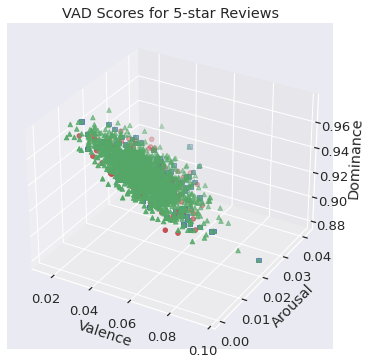

In [ ]:
# Plot the 3D scatter plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the data for each dataframe
ax.scatter(df1_5stars['valence'], df1_5stars['arousal'], df1_5stars['dominance'], c='r', marker='o')
ax.scatter(df2_5stars['valence'], df2_5stars['arousal'], df2_5stars['dominance'], c='g', marker='^')
ax.scatter(df3_5stars['valence'], df3_5stars['arousal'], df3_5stars['dominance'], c='b', marker='s')

# Set the axis labels and title
ax.set_xlabel('Valence')
ax.set_ylabel('Arousal')
ax.set_zlabel('Dominance')
ax.set_title('VAD Scores for 5-star Reviews')

# Show the plot
plt.show()


**3D scatter plot(2)** 

In [ ]:
# Combine the three dataframes into one
df_5stars = pd.concat([df1_5stars, df2_5stars, df3_5stars])

# Drop rows with missing values in the preprocessed_text column
df_5stars = df_5stars.dropna(subset=['preprocessed_text'])

# Create the VAD scores and aggregate by rating
df_5stars['vad_scores'] = df_5stars['preprocessed_text'].apply(lambda x: [get_word_vad(w) for w in x])
df_5stars['valence'] = df_5stars['vad_scores'].apply(lambda x: sum([v for v, _, _ in x]) / len(x))
df_5stars['arousal'] = df_5stars['vad_scores'].apply(lambda x: sum([a for _, a, _ in x]) / len(x))
df_5stars['dominance'] = df_5stars['vad_scores'].apply(lambda x: sum([d for _, _, d in x]) / len(x))

df_5stars_grouped = df_5stars.groupby(['business_name', 'rating']).agg({'valence': 'mean', 'arousal': 'mean', 'dominance': 'mean', 'preprocessed_text': 'count'}).reset_index()

# Create the 3D scatter plot
fig = px.scatter_3d(df_5stars_grouped, x='valence', y='arousal', z='dominance', color='business_name')

# Add axis labels and title
fig.update_layout(scene=dict(xaxis_title='Valence', yaxis_title='Arousal', zaxis_title='Dominance'),
                  title='VAD Scores for 5-star Reviews')
fig.show()

